# **JUDUL**

### Analisis Kinerja Keuangan Perusahaan Terdaftar Di Bursa Efek (IDX)

# **Import Liberary**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Memuat Dataset**

In [ ]:
paht ="/content/drive/MyDrive/checkpoint ke 2/combined_financial_data_idx.csv"
df = pd.read_csv(paht)
df

,symbol,account,type,2020,2021,2022,2023
0,AALI,Accounts Payable,BS,7.702640e+11,1.026717e+12,1.224423e+12,8.420640e+11
1,AALI,Accounts Receivable,BS,7.658490e+11,4.581350e+11,8.487700e+11,6.744870e+11
2,AALI,Accumulated Depreciation,BS,-1.092095e+13,-1.213381e+13,-1.330375e+13,-1.443685e+13
3,AALI,Additional Paid In Capital,BS,3.878995e+12,3.878995e+12,3.878995e+12,3.878995e+12
4,AALI,Allowance For Doubtful Accounts Receivable,BS,-2.426100e+10,-2.454300e+10,-2.705700e+10,-2.651600e+10
...,...,...,...,...,...,...,...
89238,ZINC,Total Unusual Items,IS,2.459341e+09,1.096695e+10,7.474979e+08,8.117474e+07
89239,ZINC,Total Unusual Items Excluding Goodwill,IS,2.459341e+09,1.096695e+10,7.474979e+08,8.117474e+07
89240,ZINC,Tradeand Other Payables Non Current,BS,1.542456e+11,3.418800e+09,3.418800e+09,3.418800e+09
89241,ZINC,Work In Process,BS,3.757703e+08,3.757703e+08,3.874522e+09,7.067292e+10


bang saya hanya menampilakan hanya 25 di datasetnya saolnya ada max_rows(20000) jadi nanti di hapus aja headnya

# **Business Understanding**
### A. Business Objective
 Dataset yang digunakan merupakan data laporan keuangan perusahaan yang terdaftar di Bursa Efek Indonesia (IDX) yang memuat beberapa variabel keuangan utama seperti Revenue, Net Income, Total Assets, dan Total Liabilities Data ini dapat digunakan untuk menggambarkan kondisi kinerja dan kesehatan finansial perusahaan Permasalahan yang dapat diangkat dari dataset ini adalah bagaimana mengetahui tingkat profitabilitas perusahaan, bagaimana struktur keuangan perusahaan berdasarkan utang dan aset, serta apakah perusahaan dengan ukuran besar selalu memiliki performa yang lebih baik dibandingkan perusahaan lainnya

### B. Assess Situation
Dataset ini terdiri dari lebih dari 1000 baris data dengan beberapa variabel numerik utama yang relevan untuk analisis keuangan Tantangan yang mungkin dihadapi dalam dataset ini antara lain adanya perbedaan skala nilai antar perusahaan yang cukup besar, kemungkinan terdapat nilai ekstrem (outlier), serta perlunya pembuatan rasio keuangan agar data lebih mudah dianalisis Selain itu dataset ini hanya berfokus pada data keuangan dan tidak mencakup faktor eksternal seperti kondisi ekonomi atau kebijakan industri yang dapat memengaruhi kinerja perusahaan

### C. Analytic Goals & Project Plan
### Goals
Untuk menjawab permasalahan tersebut analisis yang akan dilakukan meliputi analisis deskriptif terhadap Revenue dan Net Income, perhitungan rasio keuangan seperti Profit Margin dan Debt Ratio, serta analisis hubungan antara Total Assets, Revenue, dan Net Income Analisis ini bertujuan untuk mengidentifikasi pola kinerja perusahaan serta memahami hubungan antar variabel keuangan yang ada dalam dataset
### Project plan
Rencana yang akan dilakukan dalam proyek ini dimulai dengan memahami struktur dataset dan melakukan pengecekan terhadap tipe data serta kemungkinan missing value Selanjutnya dilakukan pengolahan data dengan membuat variabel turunan berupa rasio keuangan Setelah itu dilakukan analisis deskriptif dan visualisasi data untuk melihat pola distribusi dan hubungan antar variabel Tahap akhir adalah menarik insight berdasarkan hasil analisis yang telah dilakukan







# **Checkpoint 2**

## **Struktur Data**

### **Informasi dasar**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89243 entries, 0 to 89242
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   symbol   89243 non-null  object 
 1   account  89243 non-null  object 
 2   type     89243 non-null  object 
 3   2020     83988 non-null  float64
 4   2021     84474 non-null  float64
 5   2022     83634 non-null  float64
 6   2023     69831 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.8+ MB


Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 89243 Baris dan 7 Kolom

### **Informasi lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89243 entries, 0 to 89242
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   symbol   89243 non-null  object 
 1   account  89243 non-null  object 
 2   type     89243 non-null  object 
 3   2020     83988 non-null  float64
 4   2021     84474 non-null  float64
 5   2022     83634 non-null  float64
 6   2023     69831 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.8+ MB


1. symblo: 0
        Jumlah baris: 89243
        Tipe data: object
        Deskripsi: ID utama Perusahaan

2. account:
        Jumlah baris: 89243
        Tipe data: object
        Deskripsi: Nama akun keuangan perusahaan

3. type:
        Jumlah baris: 89243
        Tipe data: object
        Deskripsi: Jenis laporan keuangan

4. 2020:
        Jumlah baris: 89243
        Tipe data: float64
        Deskripsi: Nilai laporan keuangan tahun 2020

5. 2021:
        Jumlah baris: 89243
        Tipe data: float64
        Deskripsi: Nilai laporan keuangan tahun 2021

6. 2022:
        Jumlah baris: 89243
        Tipe data: float64
        Deskripsi: Nilai laporan keuangan tahun 2022

7. 2023:
        Jumlah baris: 89243
        Tipe data: float64
        Deskripsi: Nilai laporan keuangan tahun 2023

## **Informasi Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,symbol,account,type,2020,2021,2022,2023
count,89243,89243,89243,8.398800e+04,8.447400e+04,8.363400e+04,6.983100e+04
unique,604,264,3,NaN,NaN,NaN,NaN
top,TLKM,Total Tax Payable,BS,NaN,NaN,NaN,NaN
freq,199,604,38675,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.197697e+12,1.399118e+12,1.497669e+12,1.714984e+12
std,NaN,NaN,NaN,1.532871e+13,1.717454e+13,1.889606e+13,2.166294e+13
min,NaN,NaN,NaN,-4.127934e+14,-4.826358e+14,-5.610016e+14,-5.709176e+14
25%,NaN,NaN,NaN,0.000000e+00,1.648572e-01,3.511105e-01,8.170234e+04
50%,NaN,NaN,NaN,6.334818e+09,7.411000e+09,8.395047e+09,1.168128e+10
75%,NaN,NaN,NaN,2.220000e+11,2.609188e+11,2.965390e+11,3.485207e+11


1. **Count (Kelengkapan Data)** Berdasarkan data, total baris data adalah 89.243. Maka dapat disimpulkan:

* Kolom 2020 memiliki 83.988 data hilang 5.255 data

* Kolom 2021 memiliki 84.474 data hilang 4.769 data

* Kolom 2022 memiliki 83.634 data hilang 5.609 data

* Kolom 2023 memiliki 69.831 data hilang 19.412 data

**Kesimpulan:**
Kolom tahun (2020–2023) mengandung missing values, terutama pada tahun 2023 yang memiliki data kosong paling banyak, sedangkan kolom identitas perusahaan dan akun sudah lengkap

---

2. **Mean vs Median (Distribusi Data)**

* Kolom 2020

  * Mean ≈ 1.197.697.159.647

   * Median ≈ 6.334.818.263
Rata-rata jauh lebih besar dari median, menunjukkan adanya nilai ekstrem sangat tinggi

* Kolom 2021

   * Mean ≈ 1.399.118.238.439

   * Median ≈ 7.411.000.000
Perbedaan besar antara mean dan median menandakan distribusi condong ke kanan

* Kolom 2022

  * Mean ≈ 1.497.669.192.586

  * Median ≈ 8.395.046.739
Nilai rata-rata meningkat dan tetap jauh di atas median, menandakan dominasi nilai besar pada beberapa perusahaan

* Kolom 2023

   * Mean ≈ 1.714.983.705.101

   * Median ≈ 11.681.277.308
Selisih yang sangat signifikan menunjukkan banyak data dengan nilai sangat tinggi yang menarik rata-rata ke atas

**Kesimpulan:**
Secara keseluruhan, data keuangan bersifat right-skewed condong ke kanan karena terdapat beberapa nilai laporan keuangan yang sangat besar dibanding mayoritas data

---

3. **Min dan Max (Validasi Logika Data)**

* Tahun 2020

  * Min = -4.127.934.140.000.000

  * Max = 1.610.065.344.000.000

* Tahun 2021

  * Min = -4.826.358.420.000.000

  * Max = 1.725.611.128.000.000

* Tahun 2022

  * Min = -5.610.016.210.000.000

  * Max = 1.992.544.687.000.000

* Tahun 2023

  * Min = -5.709.176.430.000.000

  * Max = 2.174.219.449.000.000

**Kesimpulan:**
Adanya nilai minimum negatif yang sangat besar menunjukkan kemungkinan akun keuangan seperti kerugian atau liabilitas Rentang nilai yang sangat lebar juga wajar karena data berasal dari laporan keuangan berbagai perusahaan dengan skala aset yang berbeda-beda

---

4. **Standar Deviasi (Std) – Variabilitas Data**

* Tahun 2020

  * Mean ≈ 1.19 triliun

  * Std ≈ 153 triliun

* Tahun 2021

  * Mean ≈ 1.39 triliun

  * Std ≈ 171 triliun

* Tahun 2022

  * Mean ≈ 1.49 triliun

  * Std ≈ 188 triliun

* Tahun 2023

  * Mean ≈ 1.71 triliun

  * Std ≈ 216 triliun

**Kesimpulan:**
Nilai standar deviasi yang jauh lebih besar daripada mean menunjukkan variabilitas data yang sangat tinggi Artinya perbedaan nilai laporan keuangan antar perusahaan sangat besar dari perusahaan kecil hingga perusahaan dengan aset dan nilai keuangan sangat besar. Hal ini wajar pada dataset laporan keuangan perusahaan publik (IDX)

## **Data Type Check**

Kita akan mengecek tipe data dari setiap kolom apakah sudah sesuai atau tidak. Agar insight serta visualisasi yang akan kita buat menjadi akurat.

Dan dapat dilihat dibawah ini, seluruh kolom sudah memiliki tipe data yang sesuai dengan jenis datanya, sehingga tidak perlu dilakukan konversi tipe data.

In [ ]:
df.dtypes

,0
symbol,object
account,object
type,object
2020,float64
2021,float64
2022,float64
2023,float64


## **Incosistent Values**

Pada tahap ini dilakukan pengecekan konsistensi nilai pada dataset untuk memastikan tidak terdapat perbedaan penulisan yang dapat menyebabkan kesalahan analisis. Ketidakkonsistenan data biasanya terjadi pada kolom bertipe kategorikal object seperti kode perusahaan, akun, dan tipe laporan.

1. **Symbol (Kode Perusahaan)**

Berdasarkan struktur data, kolom symbol berfungsi sebagai identitas utama perusahaan. Nilai pada kolom ini berbentuk kode unik perusahaan dan secara umum sudah konsisten karena menggunakan format kode saham yang seragam.

In [ ]:
print(df['symbol'].unique())

['AALI' 'ABBA' 'ABDA' 'ABMM' 'ACES' 'ACST' 'ADCP' 'ADES' 'ADHI' 'ADMF'
 'ADMG' 'ADMR' 'ADRO' 'AGII' 'AGRO' 'AGRS' 'AISA' 'AKPI' 'AKRA' 'ALDO'
 'ALII' 'ALMI' 'AMAG' 'AMAN' 'AMAR' 'AMFG' 'AMMN' 'AMOR' 'AMRT' 'ANDI'
 'ANJT' 'ANTM' 'APEX' 'APIC' 'APLN' 'ARCI' 'ARGO' 'ARII' 'ARKA' 'ARKO'
 'ARMY' 'ARNA' 'ARTI' 'ARTO' 'ASDM' 'ASGR' 'ASII' 'ASLC' 'ASMI' 'ASRI'
 'ASRM' 'ASSA' 'ATIC' 'ATLA' 'AUTO' 'AVIA' 'BABP' 'BACA' 'BAJA' 'BALI'
 'BANK' 'BAPA' 'BATA' 'BBCA' 'BBHI' 'BBKP' 'BBLD' 'BBMD' 'BBNI' 'BBRI'
 'BBRM' 'BBSI' 'BBTN' 'BBYB' 'BCAP' 'BCIC' 'BCIP' 'BDKR' 'BDMN' 'BEBS'
 'BEEF' 'BEKS' 'BELI' 'BEST' 'BFIN' 'BGTG' 'BHAT' 'BHIT' 'BINA' 'BIPI'
 'BIPP' 'BIRD' 'BISI' 'BJBR' 'BJTM' 'BKDP' 'BKSL' 'BKSW' 'BLTA' 'BLTZ'
 'BMAS' 'BMHS' 'BMRI' 'BMSR' 'BMTR' 'BNBA' 'BNBR' 'BNGA' 'BNII' 'BNLI'
 'BOGA' 'BOLA' 'BOLT' 'BOSS' 'BPFI' 'BPII' 'BRAM' 'BREN' 'BRIS' 'BRMS'
 'BRNA' 'BRPT' 'BSBK' 'BSDE' 'BSIM' 'BSSR' 'BSWD' 'BTEK' 'BTEL' 'BTPN'
 'BTPS' 'BUAH' 'BUDI' 'BUKA' 'BUKK' 'BULL' 'BUMI' 'BUVA' 'BVIC' 'BWPT'
 'BYAN

2. **Account (Nama Akun Laporan Keuangan)**

Kolom account berisi nama akun laporan keuangan seperti aset, liabilitas, pendapatan, dan lain-lain Dari hasil peninjauan terdapat kemungkinan variasi penulisan nama akun misalnya perbedaan spasi, kapitalisasi, atau istilah yang miri) karena data berasal dari berbagai entitas perusahaan

In [ ]:
print(df['account'].unique())

['Accounts Payable' 'Accounts Receivable' 'Accumulated Depreciation'
 'Additional Paid In Capital' 'Allowance For Doubtful Accounts Receivable'
 'Basic Average Shares' 'Basic EPS' 'Beginning Cash Position'
 'Buildings And Improvements' 'Capital Expenditure'
 'Capital Expenditure Reported' 'Capital Stock'
 'Cash And Cash Equivalents'
 'Cash Cash Equivalents And Short Term Investments' 'Cash Dividends Paid'
 'Cash Equivalents' 'Cash Financial'
 'Cash Flowsfromusedin Operating Activities Direct' 'Changes In Cash'
 'Classesof Cash Payments'
 'Classesof Cash Receiptsfrom Operating Activities' 'Common Stock'
 'Common Stock Dividend Paid' 'Common Stock Equity'
 'Construction In Progress' 'Cost Of Revenue' 'Current Assets'
 'Current Debt' 'Current Debt And Capital Lease Obligation'
 'Current Liabilities' 'Depreciation And Amortization In Income Statement'
 'Depreciation Income Statement' 'Diluted Average Shares' 'Diluted EPS'
 'Diluted NI Availto Com Stockholders' 'EBIT' 'EBITDA'
 'Effect Of E

3.  **Type (Jenis Laporan Keuangan)**

Kolom type menunjukkan jenis laporan keuangan, seperti:

* BS (Balance Sheet)

* IS (Income Statement)

* CF (Cash Flow)

Nilai pada kolom ini relatif terbatas dan konsisten karena menggunakan kode singkatan standar laporan keuangan.

In [ ]:
print(df['type'].unique())

['BS' 'IS' 'CF']


4. **Kolom Tahun (2020, 2021, 2022, 2023)**

Kolom tahun berisi nilai numerik bertipe float yang merepresentasikan nilai keuangan perusahaan pada masing-masing tahun Karena berbentuk angka inkonsistensi format tidak ditemukan namun terdapat indikasi nilai kosong missing values pada beberapa entri yang terlihat dari jumlah data yang tidak selalu penu

In [ ]:
print(df['2020'].unique())

[ 7.70264000e+11  7.65849000e+11 -1.09209480e+13 ...  1.54245597e+11
  3.75770262e+08  5.36558887e+10]


In [ ]:
print(df['2021'].unique())

[ 1.02671700e+12  4.58135000e+11 -1.21338130e+13 ...  3.41880000e+09
  3.75770262e+08  4.59909106e+11]


In [ ]:
print(df['2022'].unique())

[ 1.22442300e+12  8.48770000e+11 -1.33037490e+13 ...  3.41880000e+09
  3.87452172e+09 -3.02363298e+10]


In [ ]:
print(df['2023'].unique())

[ 8.42064000e+11  6.74487000e+11 -1.44368470e+13 ...  3.41880000e+09
  7.06729200e+10  1.28536743e+11]


$# **Missing Values**

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom:

**2020**

Memiliki missing values sekitar 5,8%, yang dimana hal ini perlu ditangani atau dihapus.

**2021**

Memiliki missing values sekitar 5,3% yang dimana hal ini perlu ditangani dengan cara mau ditangani atau dihapus.

**2022**

Memiliki missing values sekitar 6,2% yang dimana hal ini perlu ditangani dengan cara mau ditangani atau dihapus.

**2023**

Memiliki missing values sekitar 23%, yang dimana ini cukup besar dibandingkan pada tahun-tahun sebelumnya. Sehingga perlu ditangani atau dihapus.

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
symbol,0.000000
account,0.000000
type,0.000000
2020,5.888417
2021,5.343836
2022,6.285087
2023,21.751846


## **Duplicated Values**

Pada tahap ini, kita akan mengecek duplikasi pada dataset. Hal ini dilakukan agar dataset memiliki insight dan hasil yang bersih.

In [ ]:
df[df.duplicated()]

,symbol,account,type,2020,2021,2022,2023


Terlihat pada dataset ini tidak ada duplikasi. Maka hal ini tidak perlu ditangani, namun jika ingin menangani anda dapat mengetikkan

df = df.drop_duplicates()

## **Outliers Values**

Pada tahap ini, dilakukan pengecekan nilai ekstrem (outliers) pada kolom numerik yaitu 2020, 2021, 2022, dan 2023. Hal ini bertujuan agar mendapatkan insight yang lebih akurat serta memahami sebaran nilai keuangan pada dataset

Dan terlihat pada kolom:

**2020**

Dengan persentase outliers 20,8% yang cukup tinggi karena terdapat perbedaan nilai keuangan antar perusahaan yang sangat besar.

**2021**

Dengan persentase outliers 20,1% yang masih tinggi dan menunjukkan variasi nilai yang semakin melebar.

**2022**


Dengan persentase outliers 19,5% yang signifikan akibat adanya nilai maksimum yang jauh di atas sebagian besar data.

**2023**

Dengan persentase outliers 16,4% yang tetap tinggi dan rentang data yang sangat luas.


In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

#Dataframe dari list hasil

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

#Tampilkan dataframe

display(results_df)

Kolom,Persentase Outliers
2020,20.889033
2021,20.119225
2022,19.589211
2023,16.413612


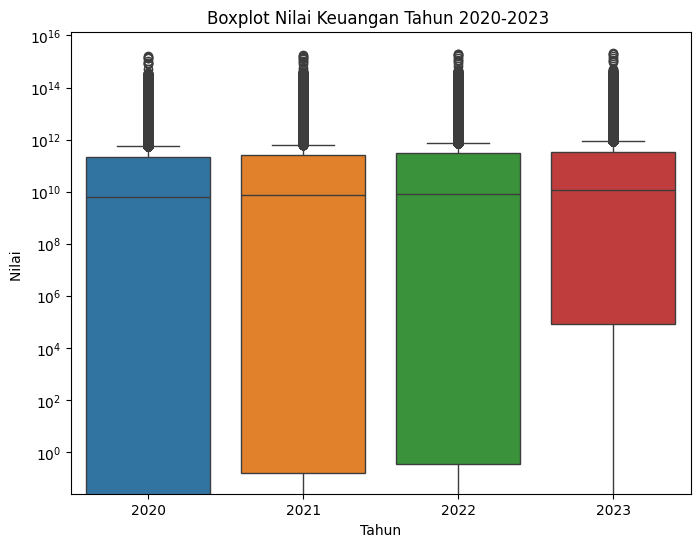

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['2020', '2021', '2022', '2023']])
plt.yscale('log')
plt.title('Boxplot Nilai Keuangan Tahun 2020-2023 ')
plt.xlabel('Tahun')
plt.ylabel('Nilai ')
plt.show()

## **Eksplorasi Data (EDA)**

### **Comparison(Perbandingan)**

Aktivitas: Membandingkan total nilai laporan keuangan pada setiap perusahaan (symblo) berdasarkan akumulasi tahun 2020–2023.

Tujuan: Mengidentifikasi perusahaan mana yang memberikan kontribusi nilai keuangan terbesar serta membandingkan kinerja keuangan antar perusahaan secara langsung dalam periode 2020–2023.

Visualisasi: Bar Chart (Grafik Batang).

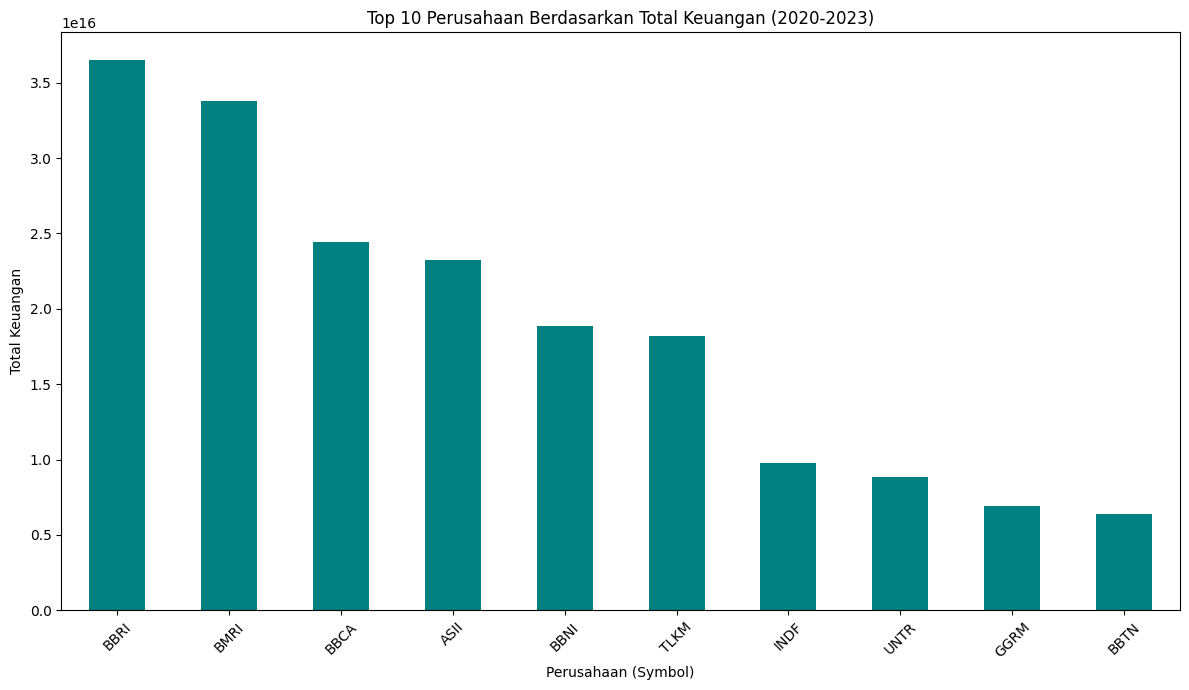

In [80]:
laporan_tahunan = df.groupby('symbol')[['2020', '2021', '2022', '2023']].sum()

laporan_tahunan['Total'] = laporan_tahunan.sum(axis=1)

top10 = laporan_tahunan.sort_values('Total', ascending=False).head(10)

plt.figure(figsize=(12,7))
top10['Total'].plot(kind='bar', color='teal')
plt.title('Top 10 Perusahaan Berdasarkan Total Keuangan (2020-2023)')
plt.xlabel('Perusahaan (Symbol)')
plt.ylabel('Total Keuangan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Composition(Komposisi)**

Aktivitas: Melihat proporsi atau persentase total nilai laporan keuangan berdasarkan perusahaan (symblo) pada periode 2020–2023.

Tujuan: Mengetahui perusahaan mana yang paling mendominasi total nilai laporan keuangan secara keseluruhan, serta melihat kontribusi masing-masing perusahaan terhadap total nilai keuangan dalam dataset.

Visualisasi: Pie Chart (Grafik Lingkaran)

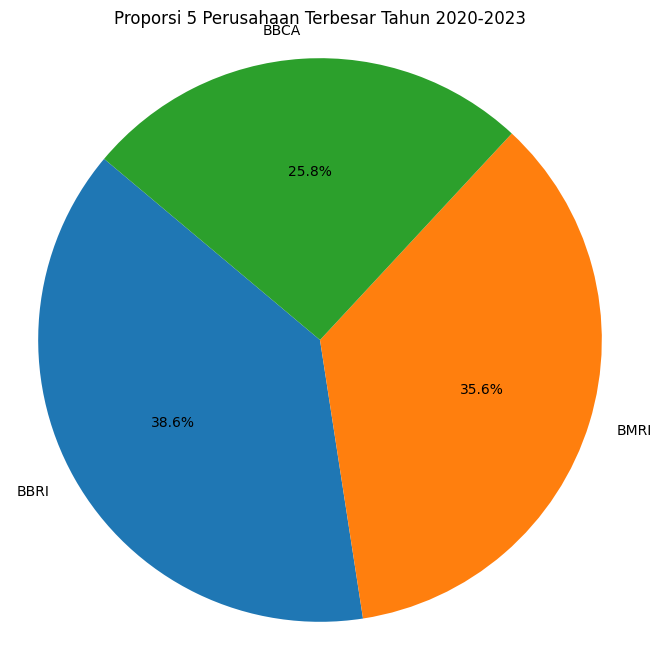

In [ ]:
total_2023 = df.groupby('symbol')[['2020', '2021', '2022', '2023']].sum().sum(axis=1).sort_values(ascending=False)
top3_2023 = total_2023.head(3)

plt.figure(figsize=(8,8))
plt.pie(
    top3_2023,
    labels=top3_2023.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Proporsi 3 Perusahaan Terbesar Tahun 2020-2023')
plt.axis('equal')
plt.show()

### **Distribution(Distribusi)**

ktivitas: Menganalisis penyebaran nilai laporan keuangan pada kolom tahun 2020–2023.

Tujuan: Melihat apakah mayoritas nilai laporan keuangan berada pada rentang rendah atau tinggi, serta mendeteksi adanya kecondongan (skewness) pada distribusi data keuangan perusahaan.

Visualisasi: Histogram.

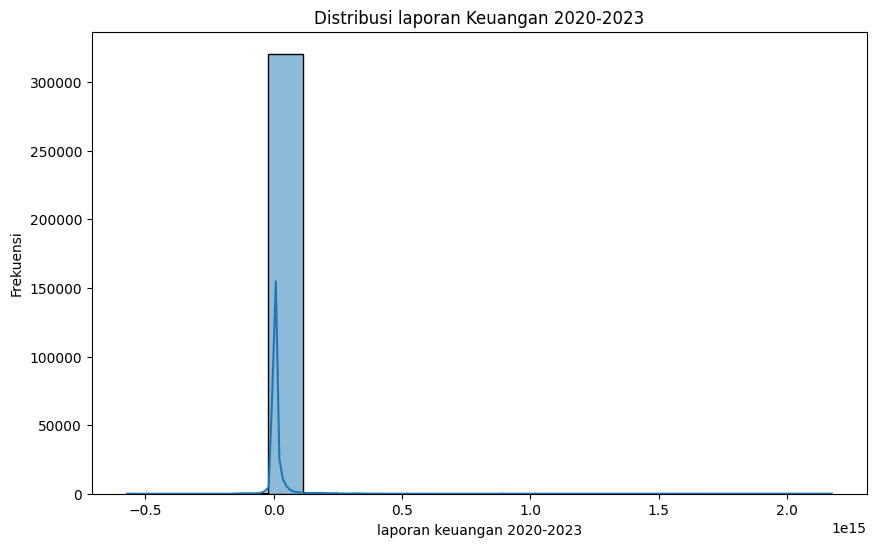

In [79]:
df_melted_years = df.melt(
    value_vars=['2020', '2021', '2022', '2023'],
    var_name='Tahun',
    value_name='laporan_keuangan_value'
)
plt.figure(figsize=(10, 6))
sns.histplot(df_melted_years['laporan_keuangan_value'], bins=20, kde=True)
plt.title('Distribusi laporan Keuangan 2020-2023')
plt.xlabel('laporan keuangan 2020-2023')
plt.ylabel('Frekuensi')
plt.show()

### **Relationship(Hubungan)**

Aktivitas: Menganalisis korelasi antara nilai laporan keuangan pada tahun 2020, 2021, 2022, dan 2023.

Tujuan: Mengetahui apakah terdapat hubungan antar nilai laporan keuangan setiap tahun, serta melihat konsistensi kinerja keuangan perusahaan dari tahun ke tahun. Analisis ini membantu memahami apakah kenaikan atau penurunan nilai keuangan pada satu tahun berkaitan dengan tahun lainnya.

Visualisasi: Heatmap (Korelasi antar laporan keuangan tahunan)

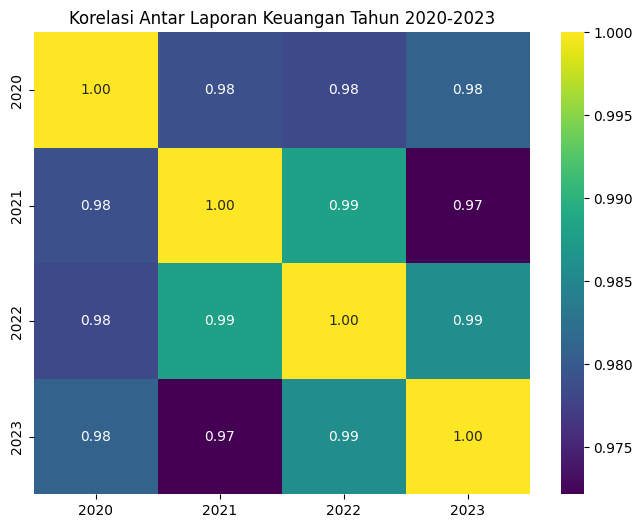

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=df[['2020', '2021', '2022', '2023']].corr(),
    annot=True,
    cmap='viridis',
    fmt='.2f'
)

plt.title('Korelasi Antar Laporan Keuangan Tahun 2020-2023')
plt.show()